In [ ]:
! unzip -l '/content/drive/My Drive/aidl/r50_guse_embeddings.zip'

Archive:  /content/drive/My Drive/aidl/r50_guse_embeddings.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
   245167  2020-11-14 21:23   annotation_map.save
995427060  2020-11-14 22:01   image_embeddings.save
248857332  2020-11-14 22:01   question_embeddings.save
   972852  2020-11-14 22:01   annotations.save
 23475567  2020-11-14 22:01   metadatas.save
    15983  2020-11-04 12:40   freq.save
---------                     -------
1268993961                     6 files


# Utilities

Fixing metadata to include `'answer_type'` and `'question_type'`

In [ ]:
#! cp '/content/drive/My Drive/aidl/full.zip' .
#! unzip full.zip
#questions_master = json.load(open('/content/mscoco_q.json', 'r'))
#annotations_master = json.load(open('/content/mscoco_a.json', 'r'))
#annotations_master[0]

In [ ]:
master = {}
for a in annotations_master:
    master[a['question_id']] = {'answer_type': a['answer_type'],'question_type': a['question_type']}



In [ ]:
for e in md:
    m = master[e['question_id']]
    e['answer_type'] = m['answer_type']
    e['question_type'] = m['question_type']

In [ ]:
for i in range(len(md2)):
  llista[i]['answer_type'] = md2[i]['answer_type']
  llista[i]['question_type'] = md2[i]['question_type']

Get number of parameters of a model

In [ ]:
def get_n_params(model):
    pp=0
    for p in list(model.parameters()):
        nn=1
        for s in list(p.size()):
            nn = nn*s
        pp += nn
    return pp

print ("{:,d} parameters".format(get_n_params(VQAmodel)))
VQAmodel

15,397,192 parameters


VQAm1(
  (iEmbedding): Sequential(
    (0): Linear(in_features=2048, out_features=1024, bias=True)
    (1): ReLU()
  )
  (qEmbedding): Sequential(
    (0): QuestionEmbedding(
      (embedding): Embedding(10288, 50)
      (lstm): LSTM(50, 512, num_layers=2, batch_first=True, bidirectional=True)
    )
    (1): Linear(in_features=2048, out_features=1024, bias=True)
    (2): ReLU()
  )
  (model): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=1024, out_features=1024, bias=True)
    (2): ReLU()
    (3): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Dropout(p=0.5, inplace=False)
    (5): Linear(in_features=1024, out_features=1000, bias=True)
  )
)

Two models' plot

In [ ]:
# Load accuracy of reference model

a1 = torch.load('/content/drive/My Drive/aidl/stats/{}_accur.save'.format(20201028180213))
ea1 = torch.load('/content/drive/My Drive/aidl/stats/{}_epoch_e_accur.save'.format(20201028180213))


In [ ]:
# plotting accuracy
title = "vgg16+trained embeddings"
s1 = "vgg + Trained embed."
s2 = ""
plt.figure(figsize=(10, 8))
plt.title(title,fontdict={'size':18,'color':'white','weight':'bold'})
plt.plot(accur, label=f'{s1} T')
plt.plot(epoch_e_accur, label=f'{s1} V')
if s2 != "":
    plt.plot(a1, label=f'{s2} T',linestyle='dotted')
    plt.plot(ea1, label=f'{s2} V',linestyle='dotted')
plt.xlabel("Epochs",color='white')
plt.ylabel("Accuracy",color='white')
plt.xticks(range(0,100,10),color='white')
plt.grid(True)
yt = []
yt.extend([e for e in range(20,110,20)])
plt.yticks(yt,color='white')
plt.legend()
plt.show()

In [ ]:
# plotting loss
plt.figure(figsize=(10, 8))
plt.title("Training Curve (batch_size={}, lr={})".format(batch_size, learning_rate),color='white')
plt.plot( losses, label="Train")
plt.xlabel("Epochs",color='white')
plt.ylabel("Loss",color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

##Analysis

In [ ]:
# load best models parameters
VQAmodel = VQAm1(4096, 2048, 1024, 1024, 1000)
VQAmodel.load_state_dict(torch.load('/content/drive/My Drive/aidl/stats/best.save'))
VQAmodel.to(device)

VQAm1(
  (iEmbedding): Sequential(
    (0): Linear(in_features=4096, out_features=1024, bias=True)
    (1): ReLU()
  )
  (qEmbedding): Sequential(
    (0): QuestionEmbedding(
      (embedding): Embedding(10288, 50)
      (lstm): LSTM(50, 512, num_layers=2, batch_first=True, bidirectional=True)
    )
    (1): Linear(in_features=2048, out_features=1024, bias=True)
    (2): ReLU()
  )
  (model): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=1024, out_features=1024, bias=True)
    (2): ReLU()
    (3): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Dropout(p=0.5, inplace=False)
    (5): Linear(in_features=1024, out_features=1000, bias=True)
  )
)

In [ ]:
# To visualize results with images, download images for COCO dataset validation 2014

! wget 'http://images.cocodataset.org/zips/val2014.zip'
! unzip -q val2014.zip

--2020-11-13 19:11:06--  http://images.cocodataset.org/zips/val2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.145.131
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.145.131|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6645013297 (6.2G) [application/zip]
Saving to: ‘val2014.zip’

val2014.zip         100%[===================>]   6.19G  16.2MB/s    in 8m 26s  

2020-11-13 19:19:32 (12.5 MB/s) - ‘val2014.zip’ saved [6645013297/6645013297]



In [ ]:
# load a presaved llista

llista = torch.load('/content/drive/My Drive/aidl/stats/training_data.save')
llista[0]

{'annotation': 'air',
 'answer_type': 'other',
 'idx': 97210,
 'image': 'COCO_val2014_000000402118.jpg',
 'question': 'Is the snowboarder in the air or touching the ground?',
 'question_type': 'is the',
 'top5': ['down', 'up', 'upside down', 'away', 'moving'],
 'top5v': [12.208353042602539,
  11.72634220123291,
  10.174568176269531,
  9.986431121826172,
  9.947663307189941]}

In [ ]:

# or compute it

import random

def analyse(model, loader):
    model.eval()
    with torch.no_grad():
        batch_iter = enumerate(loader)
        n = 97210
        l = []
        for batch, (image_embedding, question, annotation) in batch_iter:
            annotation = torch.tensor([a2mfa[e] for e in annotation])
            annotation = annotation.to(device)

            image_embedding = F.normalize(image_embedding)
            image_embedding.to(device)

            seq, seqlen = create_sequences(question,vocab)
            pseq = nn.utils.rnn.pad_sequence(seq,batch_first=True,padding_value=PAD_INDEX)
            pseq = pseq.to(device)

            y_pred = model(image_embedding, (pseq, seqlen))

            v,i = torch.topk(y_pred,5,dim=1)


            for m,(f,e) in enumerate(zip(v,i)):
                e = list(map(int,e))
                e = list(map(lambda k: mfa2a[k],e))
                e = list(map(lambda k: idx2label[k],e))
                f = list(map(float,f))
                l.append({"idx":n,
                          "image":md[n]['filename'],
                          "top5":list(e),
                          "top5v":list(f),
                          "question":question[m],
                          "annotation":md[n]['annotation_text'],
                          "question_type":md[n]['question_type'],
                          "answer_type":md[n]['answer_type']})
                n += 1


    return l

llista = analyse(VQAmodel,test_dl)


In [ ]:
ldet = set()
for i in range(len(llista)):
  if llista[i]['answer_type'] != 'yes/no':
    ldet.add(llista[i]['question_type'])

ldet

{'are',
 'are the',
 'are there',
 'are these',
 'are they',
 'can you',
 'do',
 'do you',
 'does the',
 'does this',
 'how',
 'how many',
 'how many people are',
 'how many people are in',
 'is',
 'is he',
 'is it',
 'is that a',
 'is the',
 'is the man',
 'is the person',
 'is the woman',
 'is there',
 'is there a',
 'is this',
 'is this a',
 'is this an',
 'is this person',
 'none of the above',
 'was',
 'what',
 'what animal is',
 'what are',
 'what are the',
 'what brand',
 'what color',
 'what color are the',
 'what color is',
 'what color is the',
 'what does the',
 'what is',
 'what is in the',
 'what is on the',
 'what is the',
 'what is the color of the',
 'what is the man',
 'what is the name',
 'what is the person',
 'what is the woman',
 'what is this',
 'what kind of',
 'what number is',
 'what room is',
 'what sport is',
 'what time',
 'what type of',
 'where are the',
 'where is the',
 'which',
 'who is',
 'why',
 'why is the'}

In [ ]:
total = {}
hits = {}
hits5 = {}
for t in ('yes/no','number','other'):
  total[t] = len([e for e in llista if e['answer_type'] == t])
  hits[t] = len([e for e in llista if e['answer_type'] == t and e['annotation'] == e['top5'][0]])
  hits5[t] = len([e for e in llista if e['answer_type'] == t and e['annotation'] in e['top5']])

for t in ldet:
  total[t] = len([e for e in llista if e['question_type'] == t])
  hits[t] = len([e for e in llista if e['question_type'] == t and e['annotation'] == e['top5'][0]])
  hits5[t] = len([e for e in llista if e['question_type'] == t and e['annotation'] in e['top5']])


print('Testing results according to \'answer_type\'')
print("\tType\t# ques\thits\t%\ttop 5\t%")
print("\t----\t------\t------\t-----\t-------\t-----")
for t in ('yes/no','number','other'):
    print("\t{}\t{:6,d}\t{:6,d}\t{:4.1f}%\t{:6,d}\t{:4.1f}%".format(t,total[t],hits[t],100*hits[t]/total[t],hits5[t],100*hits5[t]/total[t]))
print ()
print("\t{}\t{:6,d}\t{:6,d}\t{:4.1f}%\t{:6,d}\t{:4.1f}%".format('Total',sum([total[t] for t in ['yes/no','number','other']]),
                                                                sum([hits[t] for t in ['yes/no','number','other']]),
                                                                100*sum([hits[t] for t in ['yes/no','number','other']])/sum([total[t] for t in ['yes/no','number','other']]),
                                                                sum([hits5[t] for t in ['yes/no','number','other']]),
                                                                100*sum([hits5[t] for t in ['yes/no','number','other']])/sum([total[t] for t in ['yes/no','number','other']])))
print ()
print('Testing results according to \'question_type\'')
print("\t{:25s}\t# ques\thits\t%\ttop 5\t%".format('Type'))
print("\t{:25s}\t------\t------\t-----\t-------\t-----".format('-'*25))
for t in ldet:
    print("\t{:25s}\t{:6,d}\t{:6,d}\t{:4.1f}%\t{:6,d}\t{:4.1f}%".format(t,total[t],hits[t],100*hits[t]/total[t],hits5[t],100*hits5[t]/total[t]))

Testing results according to 'answer_type'
	Type	# ques	hits	%	top 5	%
	----	------	------	-----	-------	-----
	yes/no	 9,113	 5,916	64.9%	 9,099	99.8%
	number	 3,007	   819	27.2%	 2,061	68.5%
	other	12,182	 3,868	31.8%	 6,793	55.8%

	Total	24,302	10,603	43.6%	17,953	73.9%

Testing results according to 'question_type'
	Type                     	# ques	hits	%	top 5	%
	-------------------------	------	------	-----	-------	-----
	what sport is            	   121	   101	83.5%	   116	95.9%
	is the                   	 1,969	 1,185	60.2%	 1,900	96.5%
	what is this             	   191	    80	41.9%	   110	57.6%
	is he                    	   133	    77	57.9%	   132	99.2%
	what is in the           	   181	    40	22.1%	    71	39.2%
	what is the name         	    79	     5	 6.3%	     7	 8.9%
	is the woman             	   129	    89	69.0%	   127	98.4%
	is that a                	    84	    52	61.9%	    83	98.8%
	what is the man          	   311	   129	41.5%	   187	60.1%
	is there                 	   

In [ ]:
#torch.save(llista,'/content/drive/My Drive/aidl/stats/training_data.save')
#!cp training_data.save '/content/drive/My Drive/aidl/stats'
#! ls -lh '/content/drive/My Drive/aidl/stats/training_data.save'
#! cp best.save '/content/drive/My Drive/aidl/stats'

In [ ]:
import re
import random

def print_samples(prefix,samples):
    for s in samples:
        print ("{}\t{}\t{}\t{}\t{}\t{}\t{}".format(prefix,s['idx'],s['image'],s['question'],s['annotation'],s['top5'][0],s['top5']))
    return

def print_statistics(data,op,txt,summary=True,num_samples=3):
    if op == 'begins':
        regexp = re.compile(f'^{txt}.*')
        print (f"{txt} ...")
    else:
        if op == 'contains':
            regexp = re.compile(f'.*{txt}.*')
            print (f"... {txt} ..." if txt != "" else "All dataset")
        else:
            print (f'{op} Invalid op parameter')
            return

    if summary:
        total = len(data)

        nq = len([s for s in data if regexp.match(s['question'])])
        print ("\t# of questions : {:6,d} ({:.0f}%)".format(nq,100*nq/total))
        if nq > 0:
          top1 = len([s for s in data if regexp.match(s['question']) and s['annotation'] == s['top5'][0]])
          print ("\tAccuracy       : {:6,d} ({:.0f}%)".format(top1,100*top1/nq))
          top5 = len([s for s in data if regexp.match(s['question']) and s['annotation'] in s['top5']])
          print ("\tAccuracy top 5 : {:6,d} ({:.0f}%)".format(top5,100*top5/nq))
        print ()
        r = ""
    else:
        r = {}
        # Hits (T1)
        samples = [s for s in data if regexp.match(s['question']) and s['annotation'] == s['top5'][0]]
        if len(samples) > num_samples:
            samples = random.sample(samples,num_samples)
        print_samples('T1',samples)
        r['T1'] = [s['idx'] for s in samples]
        # Hits (T5)
        samples = [s for s in data if regexp.match(s['question']) and s['annotation'] in s['top5'] and s['annotation'] != s['top5'][0]]
        if len(samples) > num_samples:
            samples = random.sample(samples,num_samples)
        print_samples('T5',samples)
        r['T5'] = [s['idx'] for s in samples]
        # Misses
        samples = [s for s in data if regexp.match(s['question']) and s['annotation'] not in s['top5']]
        if len(samples) > num_samples:
            samples = random.sample(samples,num_samples)
        print_samples('MS',samples)
        r['MS'] = [s['idx'] for s in samples]

    return r

def print_qt_samples(data,num_samples=3,question_type='what'):
    r = {}
    # Hits (T1)
    samples = [s for s in data if s['question_type']==question_type and s['annotation'] == s['top5'][0]]
    if len(samples) > num_samples:
        samples = random.sample(samples,num_samples)
    print_samples('T1',samples)
    r['T1'] = [s['idx'] for s in samples]
    # Hits (T5)
    samples = [s for s in data if s['question_type']==question_type and s['annotation'] in s['top5'] and s['annotation'] != s['top5'][0] and s['idx'] not in r['T1']]
    if len(samples) > num_samples:
        samples = random.sample(samples,num_samples)
    print_samples('T5',samples)
    r['T5'] = [s['idx'] for s in samples]
    # Misses
    samples = [s for s in data if s['question_type']==question_type and s['annotation'] not in s['top5']]
    if len(samples) > num_samples:
        samples = random.sample(samples,num_samples)
    print_samples('MS',samples)
    r['MS'] = [s['idx'] for s in samples]

    return r

print_statistics(llista,'contains',"")
print_statistics(llista,'begins',"What color")
#print_statistics(llista,'begins',"What kind")
#print_statistics(llista,'begins',"What animal")
#print_statistics(llista,'begins',"What time")
#print_statistics(llista,'begins',"How many")
#print_statistics(llista,'begins',"Is there")
#print_statistics(llista,'begins',"Is this")
#print_statistics(llista,'begins',"How much")
#print_statistics(llista,'contains',"animal")
#print_statistics(llista,'contains',"team")

All dataset
	# of questions : 24,302 (100%)
	Accuracy       : 10,603 (44%)
	Accuracy top 5 : 17,953 (74%)

What color ...
	# of questions :  2,377 (10%)
	Accuracy       :    918 (39%)
	Accuracy top 5 :  1,860 (78%)



''

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

base = '/content/val2014'

transform = transforms.Compose([transforms.Resize(512),
                                transforms.CenterCrop(512)])

def circle(ax, x, y, radius=10, facecolor='green'):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=facecolor,
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)
                               
def draw_sample(idx,image,question,annotation,top5,top5v,save=False):
    if annotation == top5[0]:
        bg_color = 'green'
    else:
        if annotation in top5[1:]:
            bg_color = 'orange'
        else:
            bg_color = 'red'
    
    heights = [3,1]
    gs_kw = dict(height_ratios=heights)
    fig, ax = plt.subplots(ncols=1,
                           nrows=2,figsize=(10, 10),
                           gridspec_kw=gs_kw)
    textcolors=["black", "white"]
    im = Image.open(os.path.join(base,image))
    im = transform(im)
    #ax.set_title(f"{question} : {annotation}", color='white')
    ax[0].text(0.5, -.1, f"{question} : {annotation}", color='black', fontsize=18,
            fontfamily='monospace', horizontalalignment='center', transform=ax[0].transAxes)
    ax[0].axis('off')
    ax[0].imshow(im)
    circle(ax[0],585,25,20,facecolor=bg_color)
    test=np.array(top5v)
    ax[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax[1].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
    #ax[1].grid(which="minor", color="b", linestyle='-', linewidth=3)
    
    im = ax[1].imshow(test,cmap="summer",aspect=9/16)
    threshold = im.norm(test.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center", fontsize=14)
    #kw.update(textkw)

    # Get the formatter in case a string is supplied
    #if isinstance(valfmt, str):
    #    valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(len(test[0])):
#       kw.update(color=textcolors[int(im.norm(test[0][i]) > threshold)])
        kw.update(color=textcolors[0])
        text = im.axes.text(i, 0, top5[i], **kw)
        texts.append(text)
    """
    for i in range(len(top5)):
        text = ax.text(i, 0, top5[i],
                       ha="center", va="center", color="b")
    """
    ax[1].grid(which="minor", color="w", linestyle='-', linewidth=3)
    #ax[1].spines['right'].set_visible(True)
    plt.tight_layout()
    if save:
        plt.savefig("{}.jpg".format(idx),facecolor='white')

    plt.show()
    return


In [ ]:
regexp = re.compile(f'^How many.*')
query = [e['idx'] for e in llista if regexp.match(e['question']) and e['annotation']=='2' and e['top5'][0]=='1' and e['top5'][1]=='2']
query

[97234,
 97242,
 97977,
 98782,
 99469,
 99993,
 100029,
 100246,
 100291,
 100405,
 101651,
 101661,
 102208,
 104188,
 104962,
 105016,
 105504,
 105798,
 106029,
 109977,
 110236,
 110318,
 111511,
 112602,
 112838,
 113065,
 113317,
 113997,
 114553,
 114772,
 115854,
 116579,
 117848,
 118459,
 119344,
 119926,
 119954,
 120054,
 120924,
 121415]

In [ ]:
r = print_statistics(llista,'contains','What.*animal',summary=False,num_samples=10)
r

... What.*animal ...
T1	106246	COCO_val2014_000000301977.jpg	What animal is this?	cow	cow	['cow', 'dog', 'horse', 'bear', 'elephant']
T1	108039	COCO_val2014_000000131390.jpg	What kind of animals are sitting in the grass?	cows	cows	['cows', 'horses', 'sheep', 'birds', 'giraffes']
T1	101462	COCO_val2014_000000375449.jpg	What are the animals are standing on?	grass	grass	['grass', 'trees', 'dirt', 'wool', 'sheep']
T1	120487	COCO_val2014_000000558483.jpg	What animals are in the grass?	sheep	sheep	['sheep', 'cows', 'horses', 'elephants', 'ducks']
T1	109378	COCO_val2014_000000078426.jpg	What animal is in the picture?	cat	cat	['cat', 'dog', 'bear', 'cats', 'tabby']
T1	112897	COCO_val2014_000000572370.jpg	What is the animal doing?	sleeping	sleeping	['sleeping', 'resting', 'eating', 'sitting', 'laying down']
T1	119108	COCO_val2014_000000351620.jpg	What is enclosing the area around animals?	fence	fence	['fence', 'bridge', 'grass', 'dirt', 'wire']
T1	109897	COCO_val2014_000000287219.jpg	What anima

{'MS': [115692,
  104596,
  117671,
  98515,
  99944,
  105639,
  105598,
  114428,
  97596,
  106329],
 'T1': [106246,
  108039,
  101462,
  120487,
  109378,
  112897,
  119108,
  109897,
  116133,
  110093],
 'T5': [120267,
  104378,
  118242,
  103889,
  104334,
  120743,
  119782,
  118950,
  106904,
  107328]}

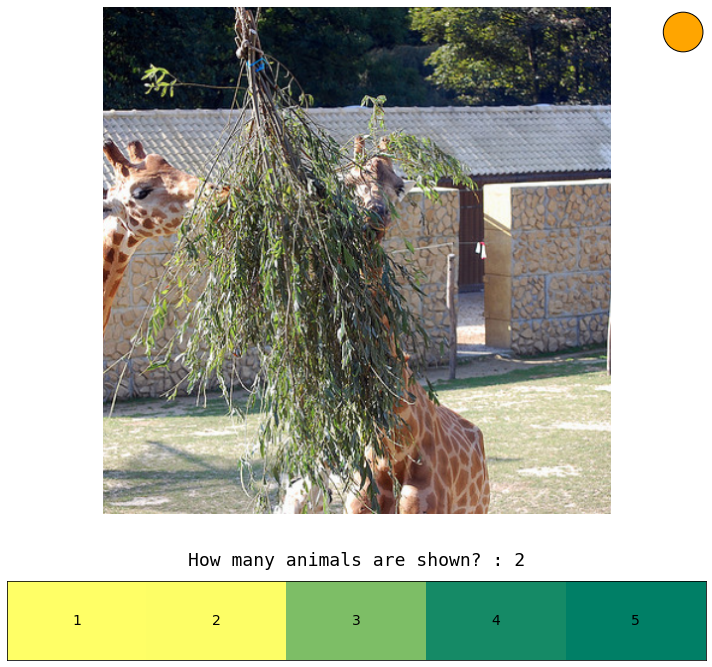

In [ ]:
for a in [s for s in llista if s['idx'] in [102208]]:
  #print (a['idx'])
  f = draw_sample(a['idx'],a['image'],a['question'], a['annotation'], a['top5'], [a['top5v']],save=True)

In [ ]:
! cp samples.zip '/content/drive/My Drive/aidl/stats'

In [ ]:
ls -1 *.jpg | sed 's/.jpg/,/' | tr -d '\n'

100680,100769,101687,102959,105469,105691,106646,106879,107787,108389,108732,109170,109813,110805,111233,111702,112326,112963,113290,113374,113534,114430,115258,116777,117551,119678,97592,99198,99523,99528,

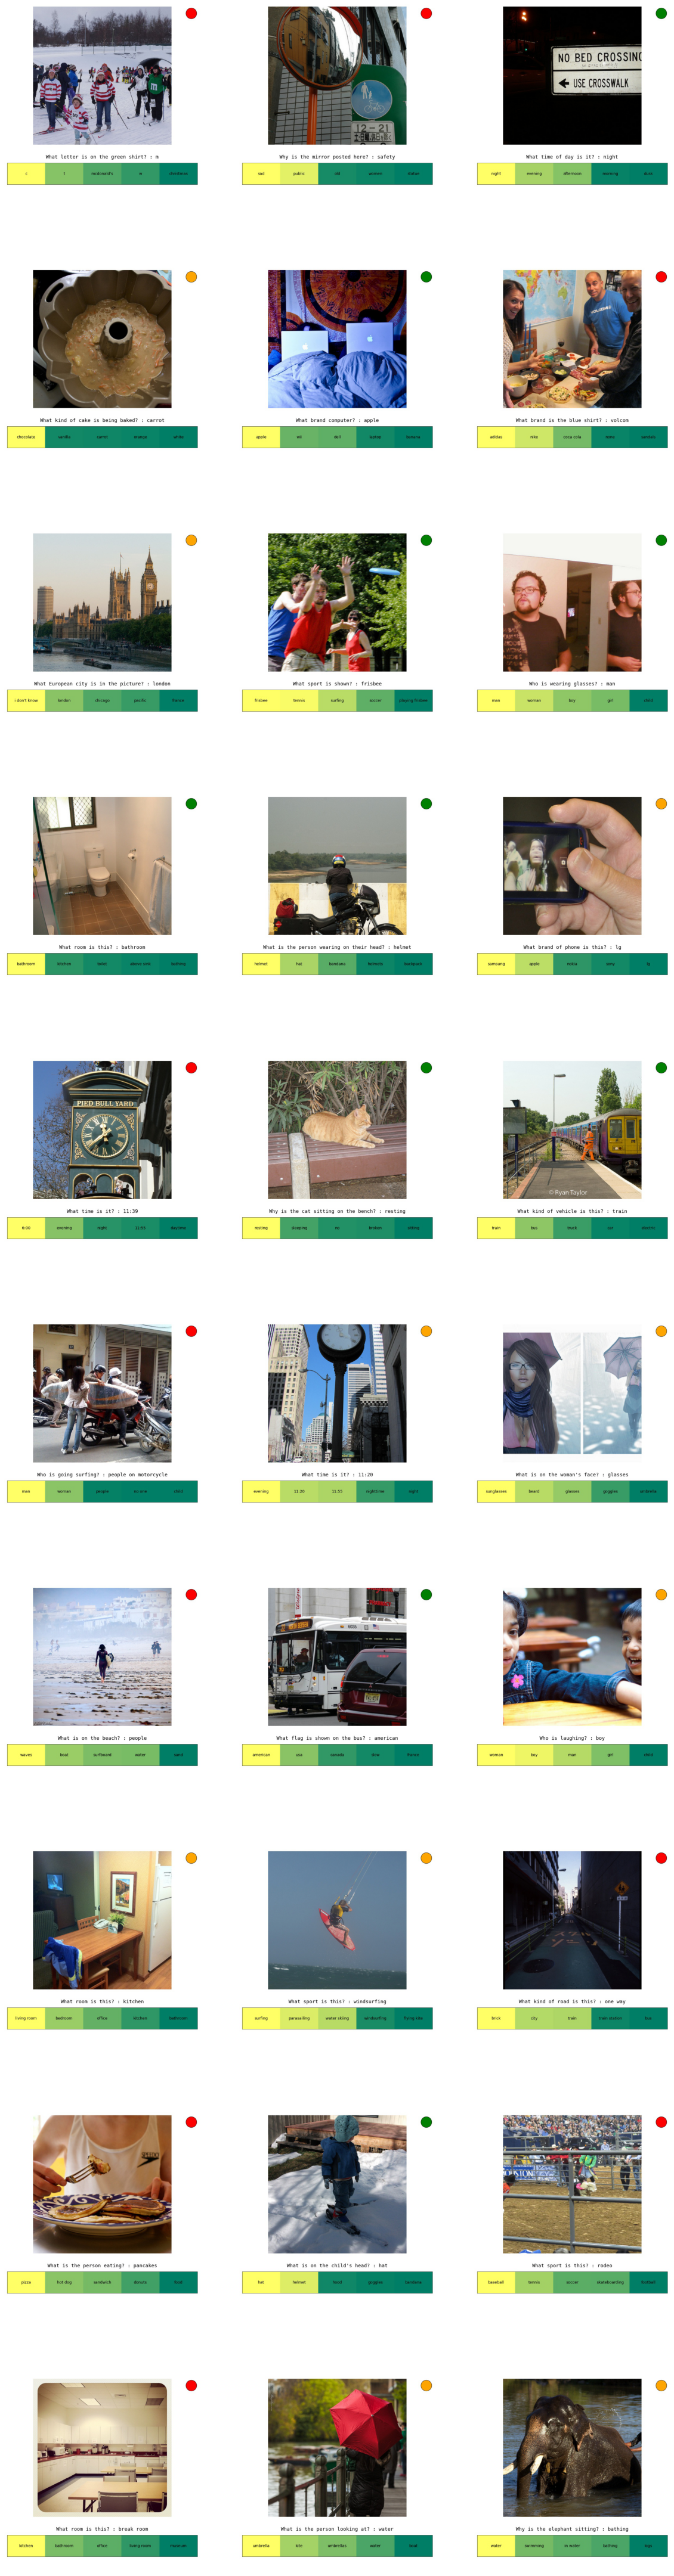

In [ ]:

l = [100680,100769,101687,102959,105469,105691,106646,106879,107787,108389,108732,109170,109813,110805,111233,111702,112326,112963,113290,113374,113534,114430,115258,116777,117551,119678,97592,99198,99523,99528]
f, axarr = plt.subplots( 10,3,figsize=(20,80),squeeze=False)
it = axarr.flat
for j,ax in enumerate(it):
    if j < len(l):
        img = Image.open(f'{l[j]}.jpg')
        ax.imshow(img)
        ax.axis('off')
    else:
        ax.axis('off')
plt.show()


In [ ]:
q = ['How many animals are shown?','What kind of animals are shown?']
hidden = None
VQAmodel.qEmbedding.eval()
seq, seqlen = create_sequences(q,vocab)
pseq = nn.utils.rnn.pad_sequence(seq,batch_first=True,padding_value=PAD_INDEX)
pseq = pseq.to(device)
#pseq = torch.unsqueeze(pseq)
inp, l = pseq, seqlen
e_pck = nn.utils.rnn.pack_padded_sequence(VQAmodel.qEmbedding[0].embedding(inp),
                                          l, batch_first=True, enforce_sorted=False)
e_pck = e_pck.to(device)
o, (h, c) = VQAmodel.qEmbedding[0].lstm(e_pck, hidden)
h = h.transpose(1,0).contiguous().view(min(batch_size,len(inp)),-1)
#e = VQAmodel.qEmbedding.forward((pseq, seqlen))
h.shape

torch.Size([2, 2048])

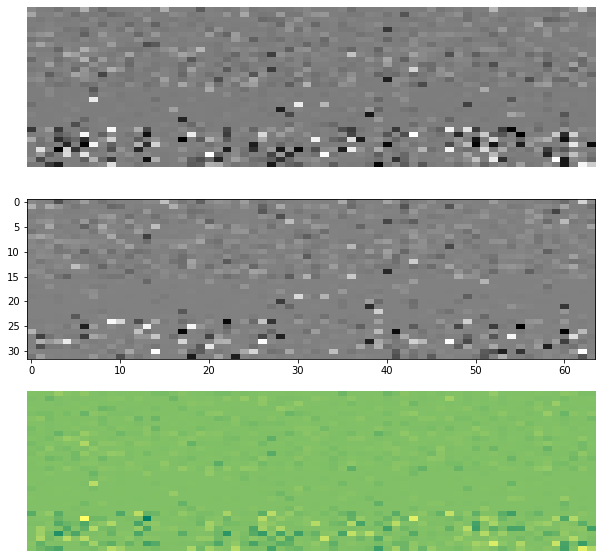

In [ ]:
#h = h.cpu().detach()
#h = h.reshape(2,32,64)
f, axarr = plt.subplots(3,1,figsize=(20,10))
axarr[0].axis('off')
im = axarr[0].imshow(h[0].numpy(),cmap="gray",interpolation='none',aspect=9/16)
im = axarr[1].imshow(h[1].numpy(),cmap="gray",interpolation='none',aspect=9/16)
im = axarr[2].imshow(h[0].numpy()-h[1].numpy(),cmap="summer",interpolation='none',aspect=9/16)
plt.axis('off')
plt.show()